In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import gc
import io
import os
from itertools import combinations

from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)

pd.reset_option('display.float_format')
pd.set_option('display.max_colwidth', None)  

from sitecustomize import ROOT # lib này được khởi tạo ban đầu dự án

import helpers.view as view
import helpers.EDA as EDA

importlib.reload(view)
importlib.reload(EDA)

<module 'helpers.EDA' from 'd:\\Data Science\\helpers\\EDA.py'>

In [2]:
def cache_clear():
    for var in list(globals()):  
        if var not in _keep_vars and not var.startswith("_"):  
            del globals()[var]  

    gc.collect()
_keep_vars = set(globals().keys())  # lưu biến gốc

# prev application

In [3]:
prev = pd.read_csv(ROOT + "/data/csv/previous_application.csv")

In [4]:
prev.sort_values(["SK_ID_CURR", "DAYS_DECISION"], ascending=[True, False]) # sắp xếp các đơn vay trước đó từ gần đến xa đối với đơn vay hiện tại

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411592,2729207,456255,Consumer loans,11514.555,58225.5,58545.0,5823.0,58225.5,FRIDAY,18,Y,1,0.098524,NaN,NaN,XAP,Approved,-500,Cash through the bank,XAP,NaN,Repeater,Computers,POS,XNA,Country-wide,20,Connectivity,6.0,high,POS mobile with interest,365243.0,-469.0,-319.0,-409.0,-400.0,0.0
608510,2073384,456255,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-648,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
596623,1179690,456255,Cash loans,28873.170,450000.0,491580.0,NaN,450000.0,TUESDAY,13,Y,1,NaN,NaN,NaN,XNA,Approved,-692,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-662.0,28.0,-212.0,-204.0,1.0
1383554,2631384,456255,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,14,Y,1,NaN,NaN,NaN,XNA,Approved,-787,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [9]:
prev[(prev["NAME_CONTRACT_TYPE"]=='Revolving loans') & (prev["AMT_APPLICATION"] != prev["AMT_GOODS_PRICE"]) & (prev["AMT_APPLICATION"]>0)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
9631,1344307,382786,Revolving loans,16875.0,202500.0,337500.0,NaN,337500.0,THURSDAY,9,N,1,NaN,NaN,NaN,XAP,Refused,-403,XNA,HC,"Spouse, partner",Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
11863,2507082,114828,Revolving loans,6750.0,135000.0,135000.0,NaN,270000.0,SATURDAY,17,N,1,NaN,NaN,NaN,XAP,Refused,-72,XNA,HC,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
12514,1069798,352773,Revolving loans,29250.0,180000.0,90000.0,NaN,585000.0,MONDAY,20,N,1,NaN,NaN,NaN,XAP,Refused,-444,XNA,HC,NaN,Refreshed,XNA,Cards,x-sell,AP+ (Cash loan),6,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
18542,1888586,386496,Revolving loans,40500.0,247500.0,810000.0,NaN,900000.0,TUESDAY,9,N,1,NaN,NaN,NaN,XAP,Refused,-829,XNA,LIMIT,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
27577,2292991,280087,Revolving loans,31500.0,382500.0,630000.0,NaN,135000.0,SATURDAY,13,N,1,NaN,NaN,NaN,XAP,Refused,-532,XNA,HC,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600632,1408589,158093,Revolving loans,36000.0,270000.0,720000.0,NaN,720000.0,THURSDAY,10,N,1,NaN,NaN,NaN,XAP,Refused,-483,XNA,HC,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
1604287,1876155,453970,Revolving loans,9000.0,45000.0,180000.0,NaN,180000.0,MONDAY,15,N,1,NaN,NaN,NaN,XAP,Refused,-509,XNA,HC,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
1622030,2576604,333163,Revolving loans,16875.0,427500.0,337500.0,NaN,337500.0,FRIDAY,14,N,1,NaN,NaN,NaN,XAP,Refused,-153,XNA,LIMIT,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
1624375,1731649,422759,Revolving loans,33750.0,225000.0,900000.0,NaN,675000.0,SATURDAY,11,N,0,NaN,NaN,NaN,XAP,Refused,-402,XNA,HC,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
des = pd.read_pickle(ROOT + "/data/pkl/description.p")
des_prev = des[des["Table"] == "previous_application"]

In [6]:
df_info = EDA.df_info(prev).reset_index()
df_merged = pd.merge(df_info, des_prev[["Row", "Description", "Special"]], 
                     left_on="index", right_on="Row", how="left").drop(columns=["Row"])
view.html_view(df_merged)

Shape: (1670214, 37)


index,DataType,#Nulls,#Uniques,Min,Mean,Std,Max,top10 val,top10 cnt,top10 ratio,Description,Special
SK_ID_PREV,int64,0,1670214,1.000001e+06,1.923089e+06,532597.958696,2845382.000,"2418762, 2030495, 2802425, 2523466, 2819243, 1784265, 2654508, 1176409, 2489754, 2486989","1, 1, 1, 1, 1, 1, 1, 1, 1, 1","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0",NaN,NaN
SK_ID_CURR,int64,0,338857,1.000010e+05,2.783572e+05,102814.823849,456255.000,"187868, 265681, 173680, 242412, 206783, 156367, 389950, 382179, 198355, 446486","77, 73, 72, 68, 67, 66, 64, 64, 63, 62","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0",ID of loan in our sample,hashed
NAME_CONTRACT_TYPE,object,0,4,NaN,NaN,NaN,NaN,"Cash loans, Consumer loans, Revolving loans, XNA","747553, 729151, 193164, 346","0.448, 0.437, 0.116, 0.0","Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
AMT_ANNUITY,float64,372235,357959,0.000000e+00,1.595512e+04,14782.137335,418058.145,"2250.0, 11250.0, 6750.0, 9000.0, 22500.0, 4500.0, 13500.0, 3375.0, 7875.0, 38250.0","31865, 13974, 13442, 12496, 11903, 10597, 7171, 4806, 4674, 4129","0.019, 0.008, 0.008, 0.007, 0.007, 0.006, 0.004, 0.003, 0.003, 0.002",Annuity of previous application,NaN
AMT_APPLICATION,float64,0,93885,0.000000e+00,1.752339e+05,292779.762386,6905160.000,"0.0, 45000.0, 225000.0, 135000.0, 450000.0, 90000.0, 180000.0, 270000.0, 675000.0, 67500.0","392402, 47831, 43543, 40678, 38905, 29367, 24738, 20573, 20227, 16861","0.235, 0.029, 0.026, 0.024, 0.023, 0.018, 0.015, 0.012, 0.012, 0.01",For how much credit did client ask on the previous application,NaN
AMT_CREDIT,float64,1,86803,0.000000e+00,1.961140e+05,318574.616547,6905160.000,"0.0, 45000.0, 225000.0, 450000.0, 135000.0, 180000.0, 90000.0, 270000.0, 900000.0, 67500.0","336768, 35051, 21094, 19954, 18720, 17085, 13781, 9842, 7432, 7245","0.202, 0.021, 0.013, 0.012, 0.011, 0.01, 0.008, 0.006, 0.004, 0.004","Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
AMT_DOWN_PAYMENT,float64,895844,29278,-9.000000e-01,6.697402e+03,20921.495410,3060045.000,"0.0, 4500.0, 9000.0, 13500.0, 22500.0, 6750.0, 2250.0, 18000.0, 45000.0, 2700.0","369854, 21241, 14747, 9655, 8165, 7709, 6241, 4526, 4059, 3362","0.221, 0.013, 0.009, 0.006, 0.005, 0.005, 0.004, 0.003, 0.002, 0.002",Down payment on the previous application,NaN
AMT_GOODS_PRICE,float64,385515,93885,0.000000e+00,2.278473e+05,315396.557937,6905160.000,"45000.0, 225000.0, 135000.0, 450000.0, 90000.0, 180000.0, 270000.0, 675000.0, 67500.0, 900000.0","47831, 43549, 40666, 38926, 29367, 24736, 20567, 20235, 16857, 15572","0.029, 0.026, 0.024, 0.023, 0.018, 0.015, 0.012, 0.012, 0.01, 0.009",Goods price of good that client asked for (if applicable) on the previous application,NaN
WEEKDAY_APPR_PROCESS_START,object,0,7,NaN,NaN,NaN,NaN,"TUESDAY, WEDNESDAY, MONDAY, FRIDAY, THURSDAY, SATURDAY, SUNDAY","255118, 255010, 253557, 252048, 249099, 240631, 164751","0.153, 0.153, 0.152, 0.151, 0.149, 0.144, 0.099",On which day of the week did the client apply for previous application,NaN
HOUR_APPR_PROCESS_START,int64,0,24,0.000000e+00,1.248418e+01,3.334028,23.000,"11, 12, 10, 13, 14, 15, 9, 16, 17, 8","192728, 185980, 181690, 172256, 157711, 142965, 127002, 121361, 95064, 73085","0.115, 0.111, 0.109, 0.103, 0.094, 0.086, 0.076, 0.073, 0.057, 0.044",Approximately at what day hour did the client apply for the previous application,rounded


In [4]:
obj_features = [c for c in prev.columns if (prev[c].dtype=="O") | (prev[c].nunique() <= 7)]

In [5]:
con_features = [c for c in prev.columns if c not in obj_features]

# split train và test trong prev

In [6]:
train = pd.read_pickle(ROOT + "/data/pkl/application_train.p")[["SK_ID_CURR", "TARGET"]]

In [7]:
train_id = train["SK_ID_CURR"].unique()

In [8]:
prev.loc[prev['SK_ID_CURR'].isin(train_id), 'data'] = 1
prev.loc[~prev['SK_ID_CURR'].isin(train_id), 'data'] = 0

In [9]:
prev_train = prev[prev["data"] == 1]
prev_test = prev[prev["data"] == 0]


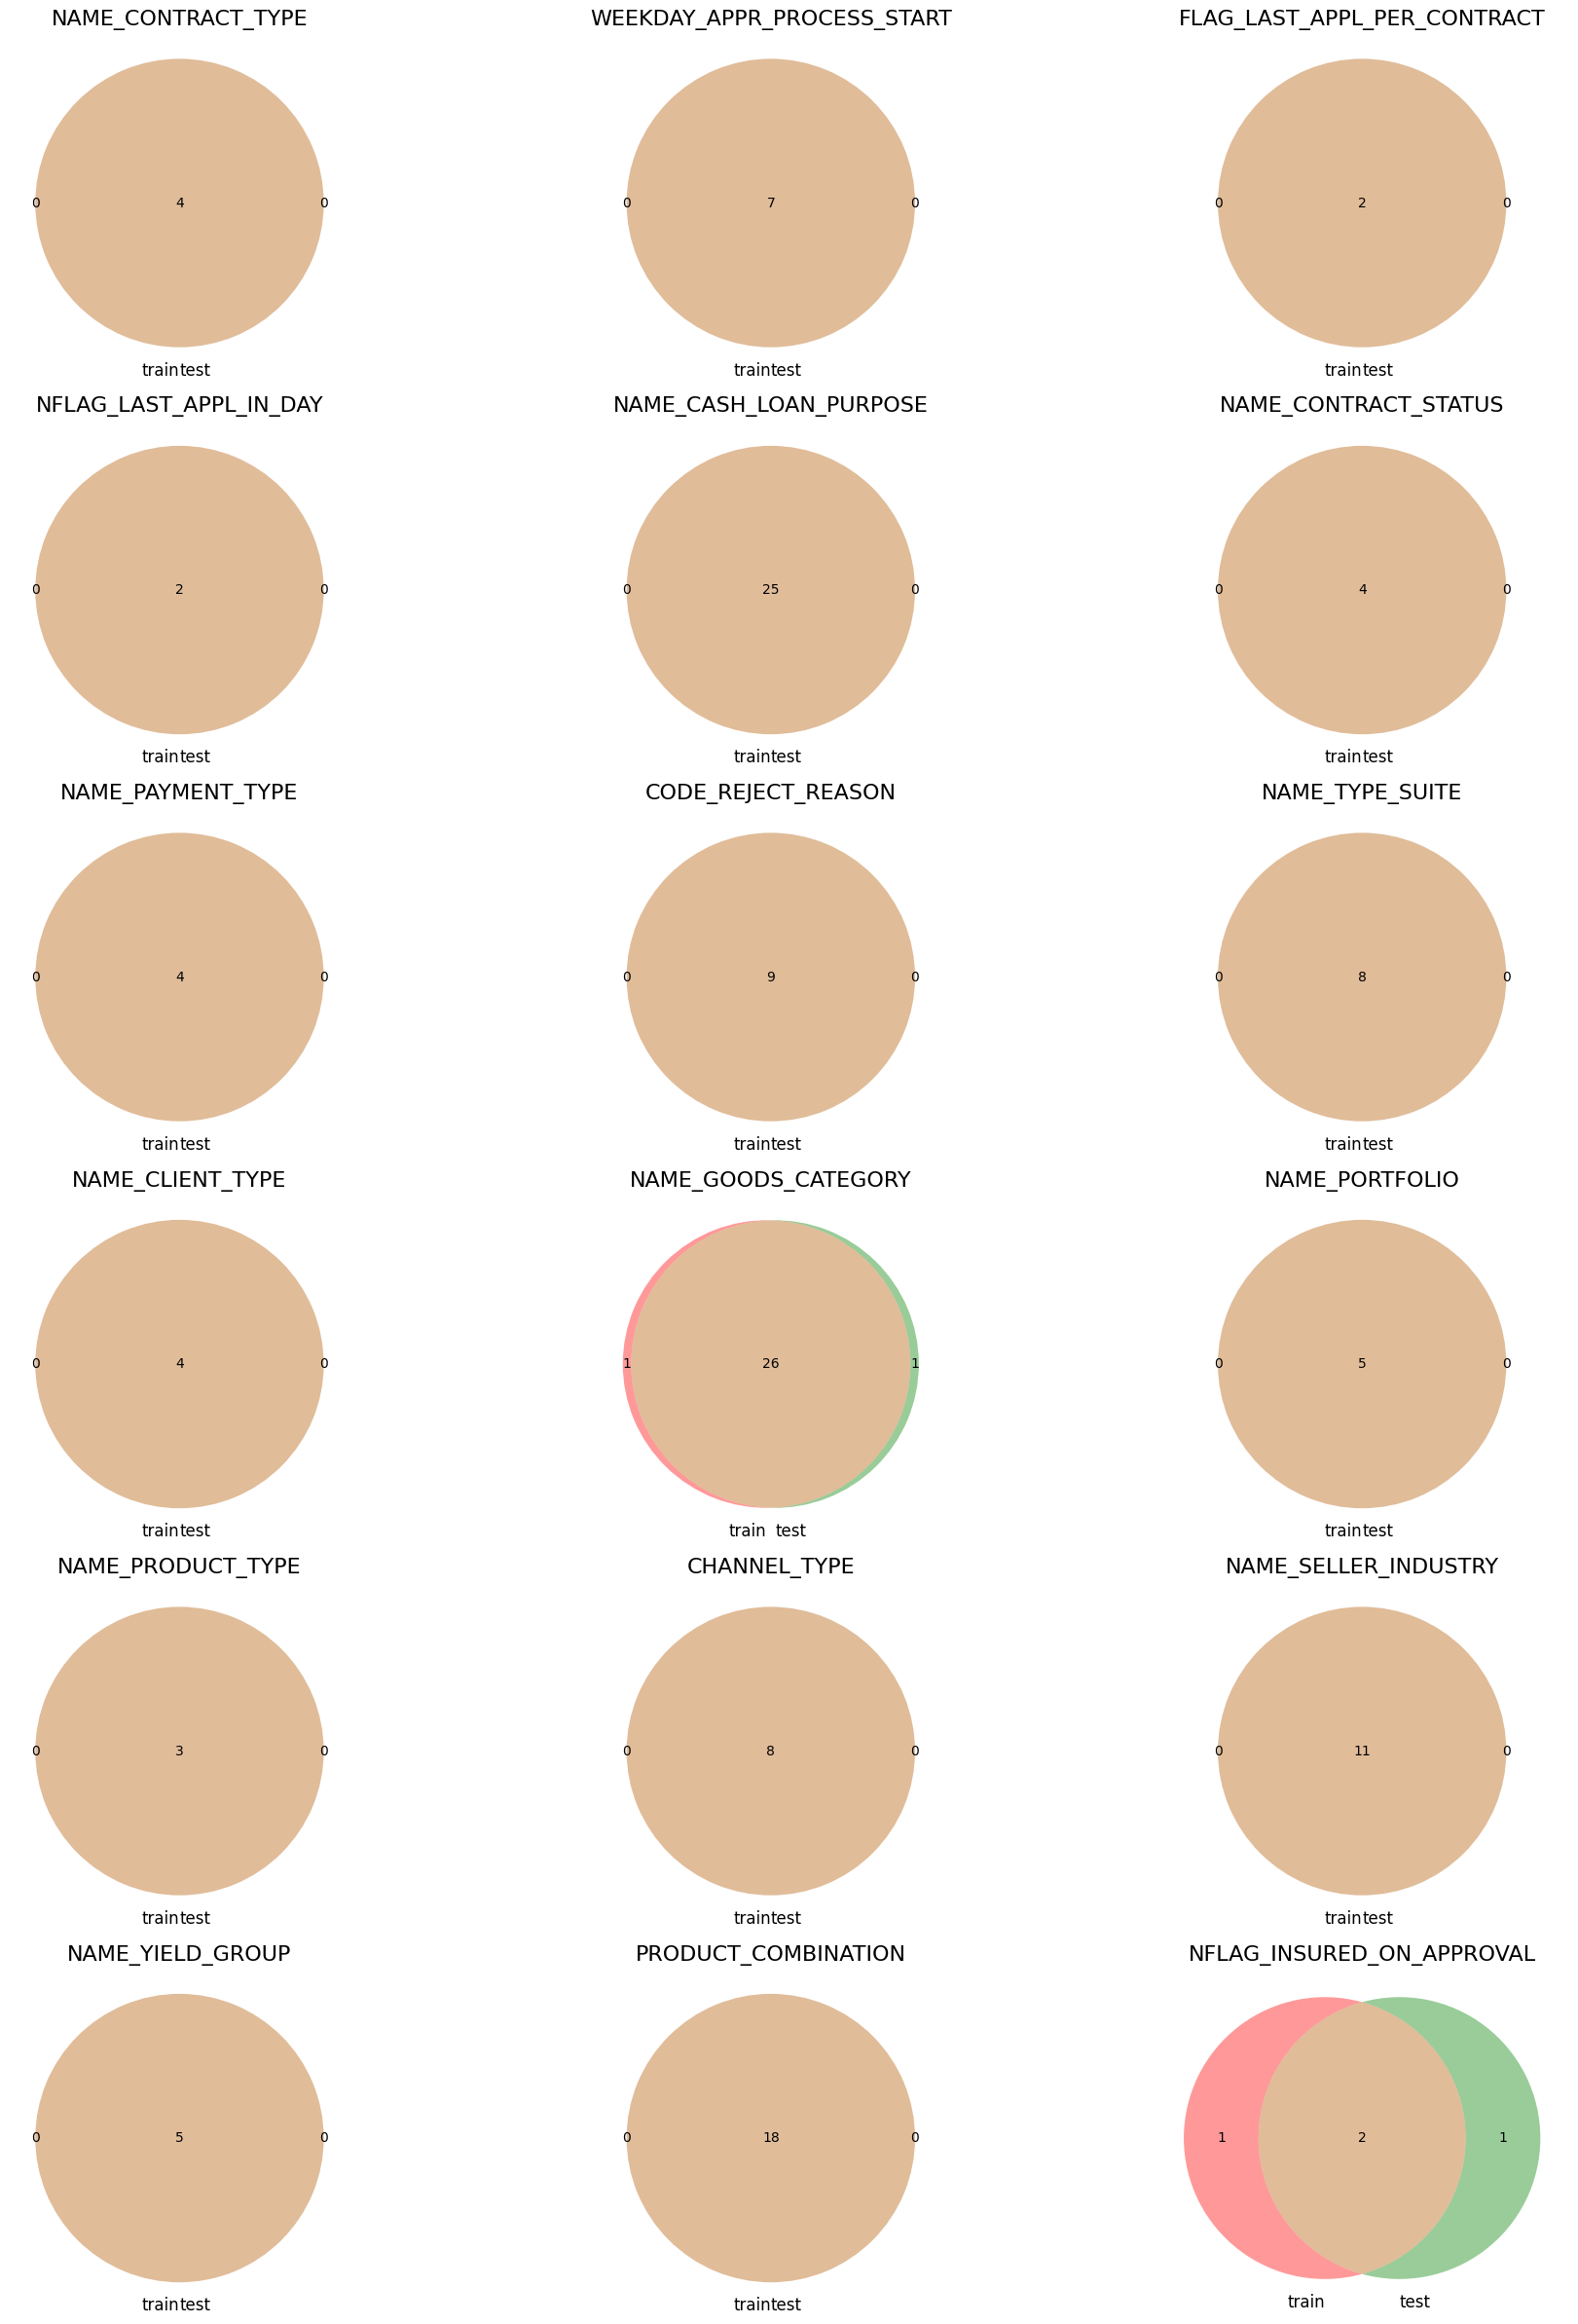

In [18]:
view.html_view_image(EDA.venn_diagram(prev_train, prev_test, obj_features))


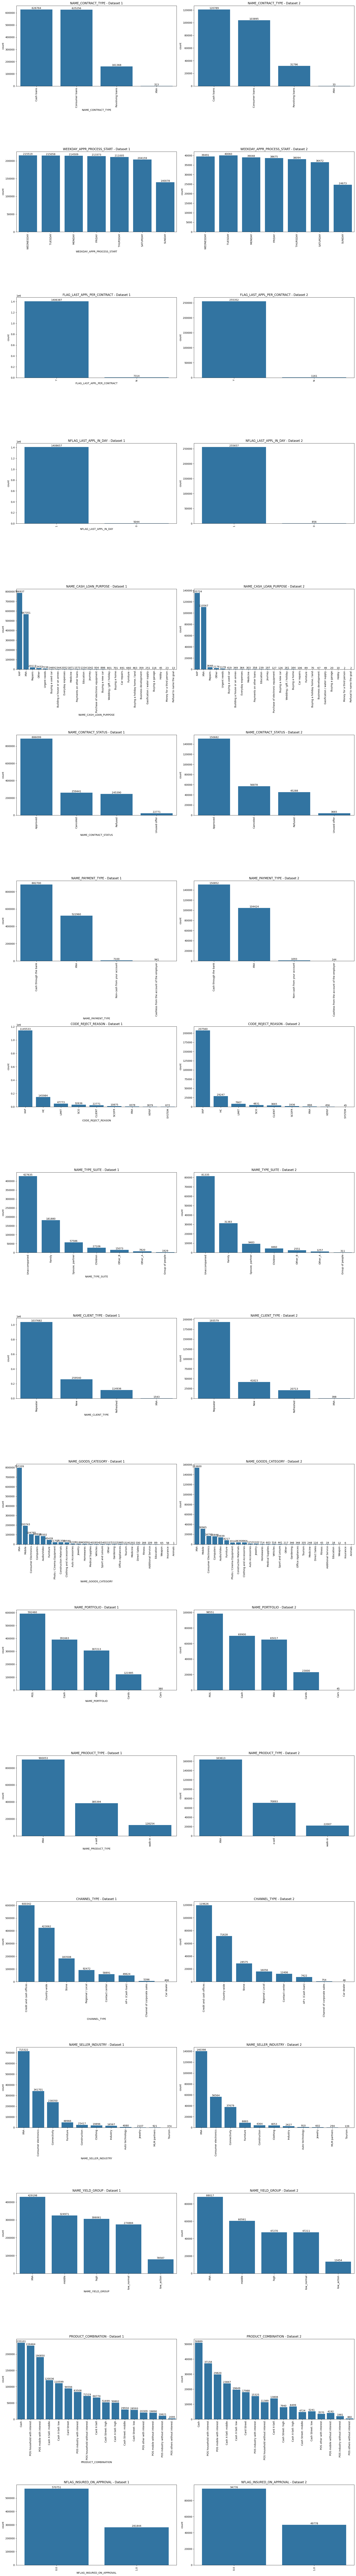

In [13]:
view.html_view_image(EDA.count_categories(prev_train, obj_features, df2=prev_test))


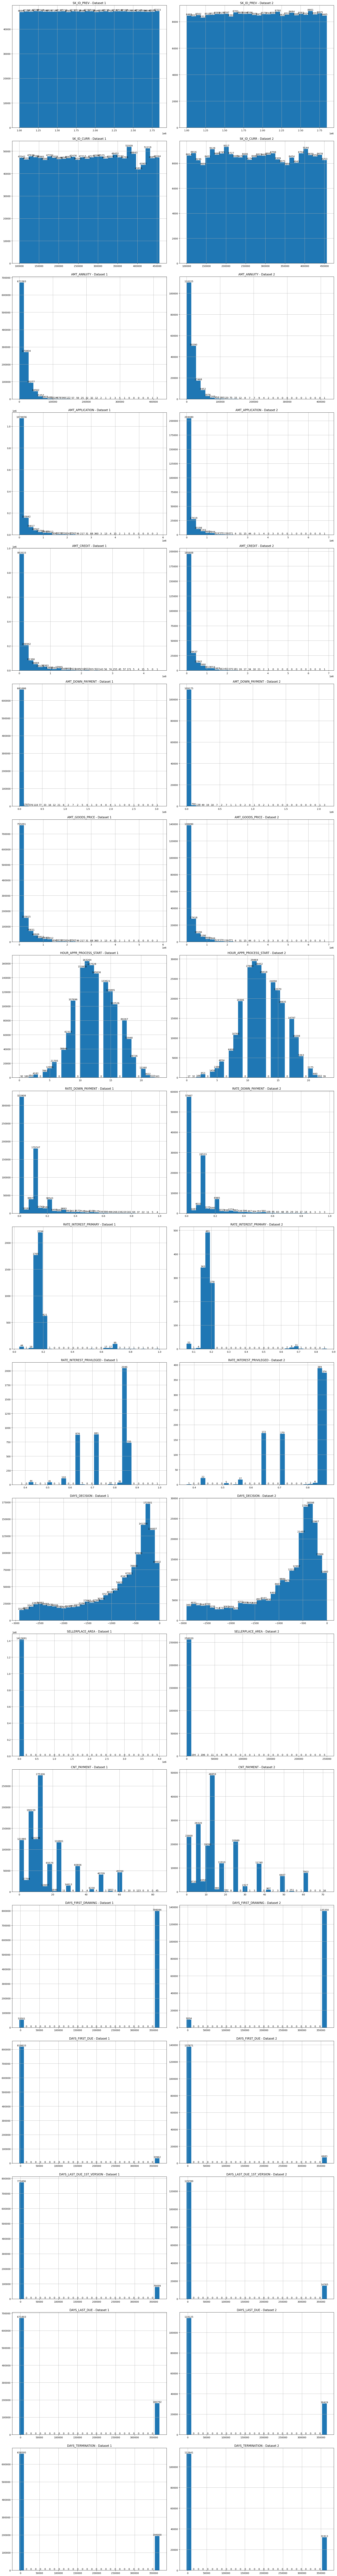

In [20]:
view.html_view_image(EDA.hist_continuous(prev_train, con_features, df2=prev_test))

* SELLER PLACE có các giá trị 4000000 nhưng không phải outlier mà là diện tích nơi bán vườn, kho hàng...
* Các cột DAYS có 365243 (365243 / 365 = 1000 năm) nên khả năng đây là null

In [10]:
prev.groupby('NAME_GOODS_CATEGORY')["SELLERPLACE_AREA"].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_GOODS_CATEGORY,,,,,,,,
Additional Service,128.0,82.460938,107.781194,1.0,12.0,30.0,100.00,368.0
Animals,1.0,60.000000,NaN,60.0,60.0,60.0,60.00,60.0
Audio/Video,99441.0,1163.803994,1967.153511,-1.0,142.0,600.0,1720.00,49151.0
Auto Accessories,7381.0,290.939846,1019.245349,-1.0,44.0,86.0,188.00,30200.0
Clothing and Accessories,23554.0,145.235586,334.693911,-1.0,30.0,60.0,120.00,20000.0
Computers,105769.0,854.113824,1949.194876,-1.0,59.0,187.0,1200.00,112000.0
Construction Materials,24995.0,1522.052891,9455.265147,-1.0,22.0,50.0,166.00,250000.0
Consumer Electronics,121576.0,1060.392026,2047.598459,-1.0,136.0,455.0,1511.00,120000.0
Direct Sales,446.0,94.374439,136.011752,-1.0,30.0,50.0,100.00,958.0


<Axes: ylabel='Density'>

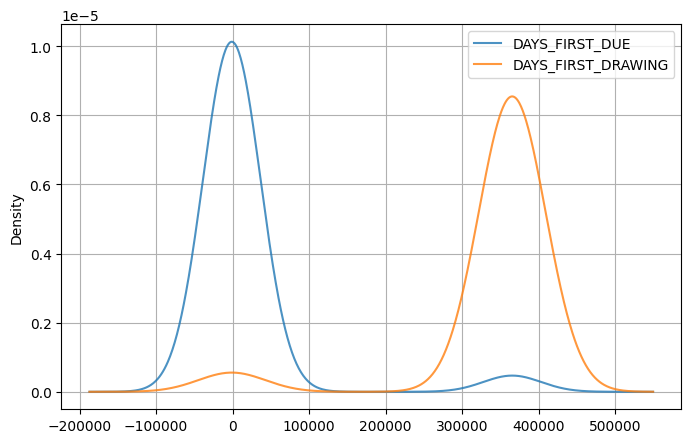

In [9]:
prev.sample(n=10000, random_state=42)["DAYS_FIRST_DUE"].plot(kind='kde', legend=True, alpha=0.8, grid=True, figsize=(8, 5), bw_method=0.5)
prev.sample(n=10000, random_state=42)["DAYS_FIRST_DRAWING"].plot(kind='kde', legend=True, alpha=0.8, grid=True, figsize=(8, 5), bw_method=0.5)

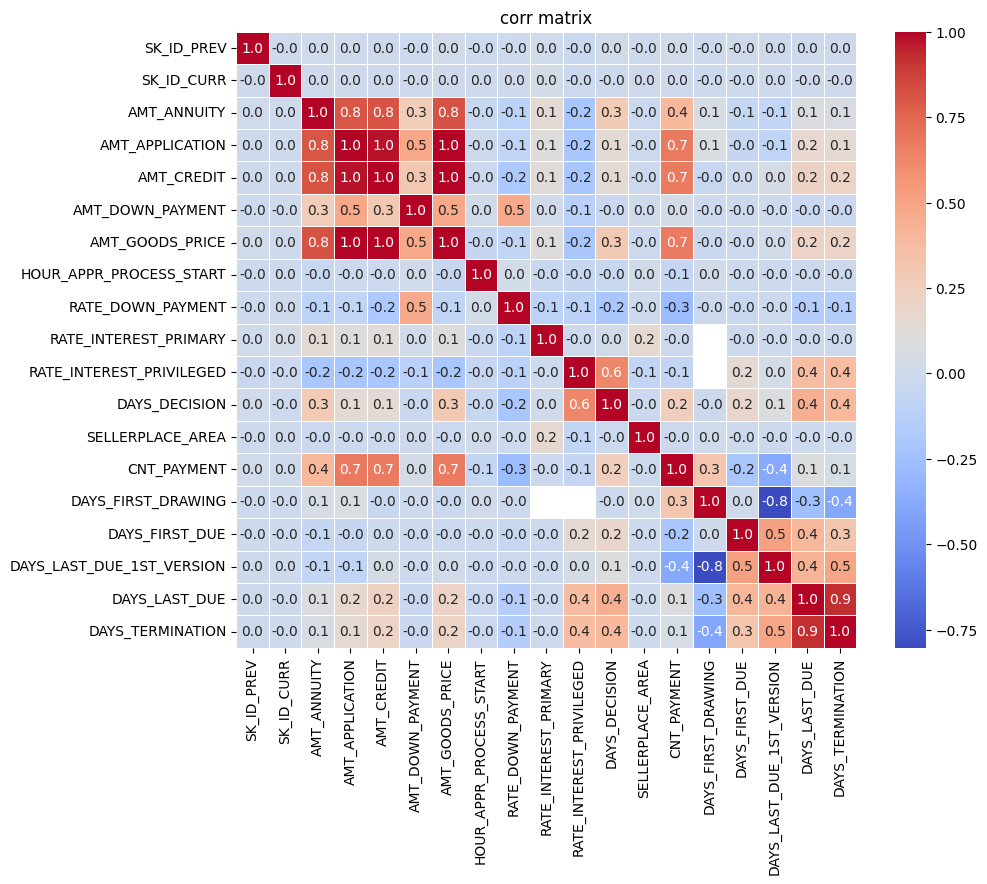

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(prev[con_features].corr(), annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("corr matrix")
plt.show()

ma trận tương quan

In [11]:
tmp = pd.merge(prev, train, on = "SK_ID_CURR", how="left")

In [12]:
hehe_list = []

for obj_feature in obj_features:
    mean_df = tmp.groupby(obj_feature)[["TARGET", "AMT_APPLICATION", "AMT_CREDIT", "AMT_DOWN_PAYMENT", "AMT_GOODS_PRICE"]].mean()
    mean_df["index"] = mean_df.index
    mean_df["column"] = obj_feature
    mean_df["std"] = mean_df["TARGET"].std()

    hehe_list.append(mean_df)

hehe = pd.concat(hehe_list, axis=0)

In [13]:
view.html_view(hehe)

TARGET,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,index,column,std
0.091258,2.747604e+05,3.040615e+05,0.000000,4.430729e+05,Cash loans,NAME_CONTRACT_TYPE,0.056271
0.077100,9.378783e+04,9.152459e+04,7152.160754,9.396270e+04,Consumer loans,NAME_CONTRACT_TYPE,0.056271
0.104686,9.781624e+04,1.735056e+05,3260.822392,2.028491e+05,Revolving loans,NAME_CONTRACT_TYPE,0.056271
0.201278,0.000000e+00,0.000000e+00,NaN,NaN,XNA,NAME_CONTRACT_TYPE,0.056271
0.087504,1.800406e+05,2.023820e+05,6552.472640,2.369948e+05,FRIDAY,WEEKDAY_APPR_PROCESS_START,0.003081
0.088607,1.853158e+05,2.084088e+05,6364.643423,2.492422e+05,MONDAY,WEEKDAY_APPR_PROCESS_START,0.003081
0.083469,1.590001e+05,1.763391e+05,7054.008605,1.952073e+05,SATURDAY,WEEKDAY_APPR_PROCESS_START,0.003081
0.080548,1.362264e+05,1.472388e+05,6885.334627,1.592815e+05,SUNDAY,WEEKDAY_APPR_PROCESS_START,0.003081
0.088898,1.816242e+05,2.041875e+05,6575.044401,2.416547e+05,THURSDAY,WEEKDAY_APPR_PROCESS_START,0.003081
0.087674,1.847515e+05,2.078494e+05,6709.456257,2.483377e+05,TUESDAY,WEEKDAY_APPR_PROCESS_START,0.003081


In [16]:
prev[(prev['NAME_CONTRACT_STATUS']!='Approved') & (prev['AMT_DOWN_PAYMENT']>0) & (prev['NAME_CONTRACT_TYPE']=='Revolving loans')].head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,data
36265,1020147,280938,Revolving loans,3780.0,98995.50,54000.0,49500.00,98995.50,FRIDAY,15,Y,1,0.520870,NaN,NaN,XAP,Refused,-2647,XNA,SCO,NaN,New,Audio/Video,Cards,x-sell,Country-wide,771,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
76810,1804255,302940,Revolving loans,3780.0,52155.00,54000.0,5215.50,52155.00,TUESDAY,13,Y,1,0.095923,NaN,NaN,XAP,Refused,-2529,XNA,VERIF,NaN,New,Consumer Electronics,Cards,x-sell,Stone,171,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
79648,2279837,376463,Revolving loans,3780.0,55719.00,54000.0,5575.50,55719.00,SATURDAY,13,Y,1,0.101925,NaN,NaN,XAP,Refused,-2387,XNA,LIMIT,NaN,Repeater,Consumer Electronics,Cards,x-sell,Stone,124,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
87077,1662610,352548,Revolving loans,4410.0,76455.00,63000.0,18000.00,76455.00,MONDAY,13,Y,1,0.242020,NaN,NaN,XAP,Refused,-2140,XNA,HC,NaN,Repeater,Consumer Electronics,Cards,x-sell,Stone,430,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
115776,1759063,242700,Revolving loans,5040.0,70497.00,72000.0,7051.50,70497.00,SATURDAY,14,Y,1,0.097148,NaN,NaN,XAP,Refused,-2590,XNA,SCO,NaN,New,Furniture,Cards,x-sell,Stone,1526,Furniture,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
119483,2770833,162078,Revolving loans,8820.0,132255.00,126000.0,13225.50,132255.00,MONDAY,9,Y,1,0.103456,NaN,NaN,XAP,Refused,-2531,XNA,SCO,NaN,New,Consumer Electronics,Cards,x-sell,Stone,23,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
132596,1534257,277286,Revolving loans,3780.0,57105.00,54000.0,5710.50,57105.00,SUNDAY,11,Y,1,0.104157,NaN,NaN,XAP,Refused,-2820,XNA,VERIF,NaN,New,XNA,Cards,x-sell,Country-wide,-1,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,0.0
145390,1834094,254697,Revolving loans,1890.0,29205.00,27000.0,8761.50,29205.00,MONDAY,13,Y,1,0.266825,NaN,NaN,XAP,Refused,-2665,XNA,SCO,NaN,New,XNA,Cards,x-sell,Country-wide,95,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
150494,2286020,148508,Revolving loans,1890.0,31455.00,27000.0,9436.50,31455.00,WEDNESDAY,11,Y,1,0.282058,NaN,NaN,XAP,Refused,-2429,XNA,SCO,NaN,Repeater,Computers,Cards,x-sell,Country-wide,364,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0
172797,1094226,247082,Revolving loans,2520.0,40860.00,36000.0,8172.00,40860.00,SATURDAY,12,Y,1,0.201486,NaN,NaN,XAP,Refused,-2651,XNA,SCO,NaN,Repeater,XNA,Cards,x-sell,Country-wide,267,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [15]:
prev[(prev['NAME_CONTRACT_STATUS']!='Approved')].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,data
count,6.334330e+05,633433.000000,261206.000000,6.334330e+05,6.334330e+05,1.119890e+05,2.907530e+05,633433.000000,633433.000000,111989.000000,0.0,0.0,633433.000000,633433.000000,261207.000000,0.0,0.0,0.0,0.0,0.0,0.0,633433.000000
mean,1.954909e+06,278546.009491,20856.144266,1.665048e+05,1.855566e+05,5.720065e+03,3.628741e+05,12.263995,0.991849,0.047672,NaN,NaN,-520.460765,110.231253,23.722638,NaN,NaN,NaN,NaN,NaN,NaN,0.832925
std,5.261551e+05,102843.679632,17309.074465,3.473040e+05,3.786454e+05,2.845015e+04,4.377370e+05,3.329509,0.089913,0.088214,NaN,NaN,604.971217,949.820049,20.317451,NaN,NaN,NaN,NaN,NaN,NaN,0.373043
min,1.009238e+06,100005.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,-2922.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.512756e+06,189411.000000,8756.550000,0.000000e+00,0.000000e+00,0.000000e+00,7.343100e+04,10.000000,1.000000,0.000000,NaN,NaN,-524.000000,-1.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,1.966290e+06,279176.000000,16013.835000,0.000000e+00,0.000000e+00,0.000000e+00,1.836765e+05,12.000000,1.000000,0.000000,NaN,NaN,-304.000000,-1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,2.405859e+06,367845.000000,28465.380000,1.575000e+05,1.800000e+05,4.257000e+03,4.500000e+05,15.000000,1.000000,0.102802,NaN,NaN,-183.000000,0.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,2.845382e+06,456255.000000,418058.145000,6.905160e+06,6.905160e+06,2.475000e+06,6.905160e+06,23.000000,1.000000,0.939195,NaN,NaN,-2.000000,74625.000000,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [16]:
prev[(prev['NAME_CONTRACT_STATUS']=='Approved')].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,data
count,1.036781e+06,1.036781e+06,1.036773e+06,1.036781e+06,1.036780e+06,6.623810e+05,9.939460e+05,1.036781e+06,1.036781e+06,662381.000000,5951.000000,5951.000000,1.036781e+06,1.036781e+06,1.036777e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.036781e+06
mean,1.903648e+06,2.782418e+05,1.472035e+04,1.805670e+05,2.025642e+05,6.862641e+03,1.883487e+05,1.261871e+01,9.992891e-01,0.085041,0.188357,0.773503,-1.100759e+03,4.384161e+02,1.412206e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570,8.546636e-01
std,5.355669e+05,1.027971e+05,1.380235e+04,2.536188e+05,2.753027e+05,1.935659e+04,2.561813e+05,3.329629e+00,2.665238e-02,0.109881,0.087671,0.100879,7.915365e+02,9.013632e+03,1.196328e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134,3.524398e-01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00
25%,1.435012e+06,1.892590e+05,5.940360e+03,4.500000e+04,4.797000e+04,0.000000e+00,4.702500e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.642000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000,1.000000e+00
50%,1.896641e+06,2.784470e+05,1.038024e+04,9.000000e+04,1.022085e+05,2.250000e+03,9.670950e+04,1.200000e+01,1.000000e+00,0.093318,0.189122,0.835095,-8.620000e+02,3.400000e+01,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000,1.000000e+00
75%,2.368895e+06,3.672990e+05,1.833799e+04,1.963395e+05,2.250000e+05,8.338500e+03,2.068999e+05,1.500000e+01,1.000000e+00,0.108920,0.193330,0.852537,-4.600000e+02,1.540000e+02,1.800000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000,1.000000e+00
max,2.843499e+06,4.562550e+05,3.938687e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,1.000000e+00


In [17]:
_keep_vars.update(["prev", "obj_features", "con_features", "tmp"])

In [18]:
cache_clear()